In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# === Load both datasets ===

sbs_parallel = {i: pd.read_csv(f"SB/halpha_results_Z/SB{i}_halpha_results.csv") for i in range(1,8)}
sbs_orth     = {i: pd.read_csv(f"SB/halpha_results_Z/SB{i}_halpha_results_orth.csv") for i in range(1,8)}

# === Load both datasets ===
wbs_parallel = [1, 2, 3, 4, 5, 6, 7]
wbs_orth     = [1, 2, 5, 6, 7]

wbs_parallel = {i: pd.read_csv(f"WB/halpha_results_Z/WB{i}_halpha_results.csv") for i in wbs_parallel}
wbs_orth     = {i: pd.read_csv(f"WB/halpha_results_Z/WB{i}_halpha_results_orth.csv") for i in wbs_orth}


In [3]:
colors = plt.cm.tab10.colors  # 10 distinct colors
color_map = {i: colors[i-1] for i in range(1, 8)}

In [4]:
sb_center_pixels = {
    1: 190,
    2: 192,
    3: 195,
    4: 192,
    5: 192,
    6: 194,
    7: 189,}

sb_center_pixels_orth = {
    1: 193,
    2: 188,
    3: 190,
    4: 187,
    5: 184,
    6: 186,
    7: 189,}

sb_bar_lengths = {
    1: 13.26115798,
    2: 7.801902515,
    3: 5.863607675,
    4: 5.392712855,
    5: 8.840541595,
    6: 5.72536702,
    7: 6.06715746,
}

wb_center_pixels = {
    1: 194,
    2: 189,
    3: 191,
    4: 190,
    5: 185,
    6: 196,
    7: 199,}

wb_center_pixels_orth = {
    1: 190,
    2: 189,
    5: 203,
    6: 189,
    7: 189,}

wb_bar_lengths = {
    1: 2.069913304,
    2: 4.217194803,
    3: 1.96915261,
    4: 3.266140464,
    5: 1.859520678,
    6: 3.899131707,
    7: 2.481995787,
}


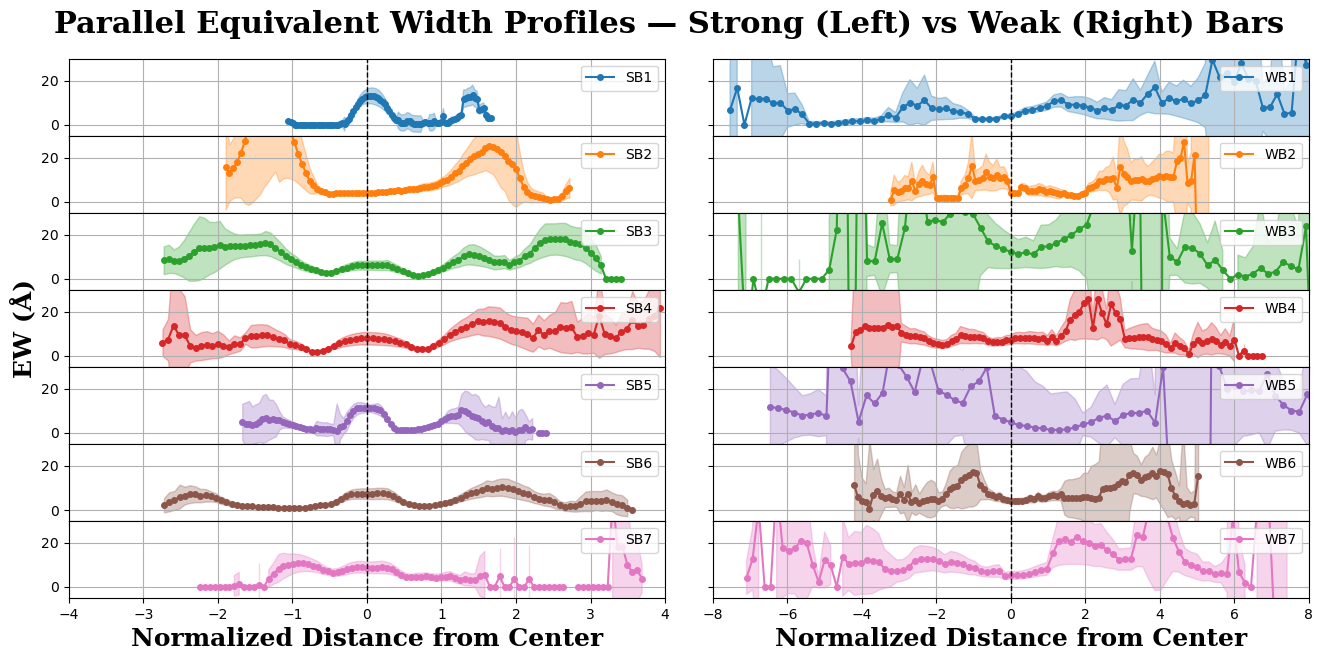

In [5]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey=True)

if len(sbs_parallel) == 1:
    axs = [axs]  # Keep consistent structure

for row_idx, i in enumerate(sbs_parallel.keys()):
    # --- Strong ---
    df_sb = sbs_parallel[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]
    
    axs[row_idx, 0].plot(x_scaled_sb, df_sb["EW"], "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb,
        df_sb["EW"] - df_sb["EW_err"],
        df_sb["EW"] + df_sb["EW_err"],
        color=color_map[i],
        alpha=0.3
    )
    axs[row_idx, 0].set_ylim(-5, 30)
    axs[row_idx, 0].set_xlim(-4, 4)
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_parallel:
        df_wb = wbs_parallel[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]
        
        axs[row_idx, 1].plot(x_scaled_wb, df_wb["EW"], "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb,
            df_wb["EW"] - df_wb["EW_err"],
            df_wb["EW"] + df_wb["EW_err"],
            color=color_map[i],
            alpha=0.3
        )
    axs[row_idx, 1].set_xlim(-8, 8)
    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)
    
for ax in axs[:-1, :].flatten():
    ax.tick_params(labelbottom=False) 
# Axis labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")

axs[len(sbs_parallel)//2, 0].set_ylabel("EW (Å)", fontsize=18, fontweight="bold", family="serif")

# Overall title
plt.suptitle(
    "Parallel Equivalent Width Profiles — Strong (Left) vs Weak (Right) Bars",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95
)

plt.subplots_adjust(hspace=0, wspace=0.08)
plt.savefig("EW_profiles.png", dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


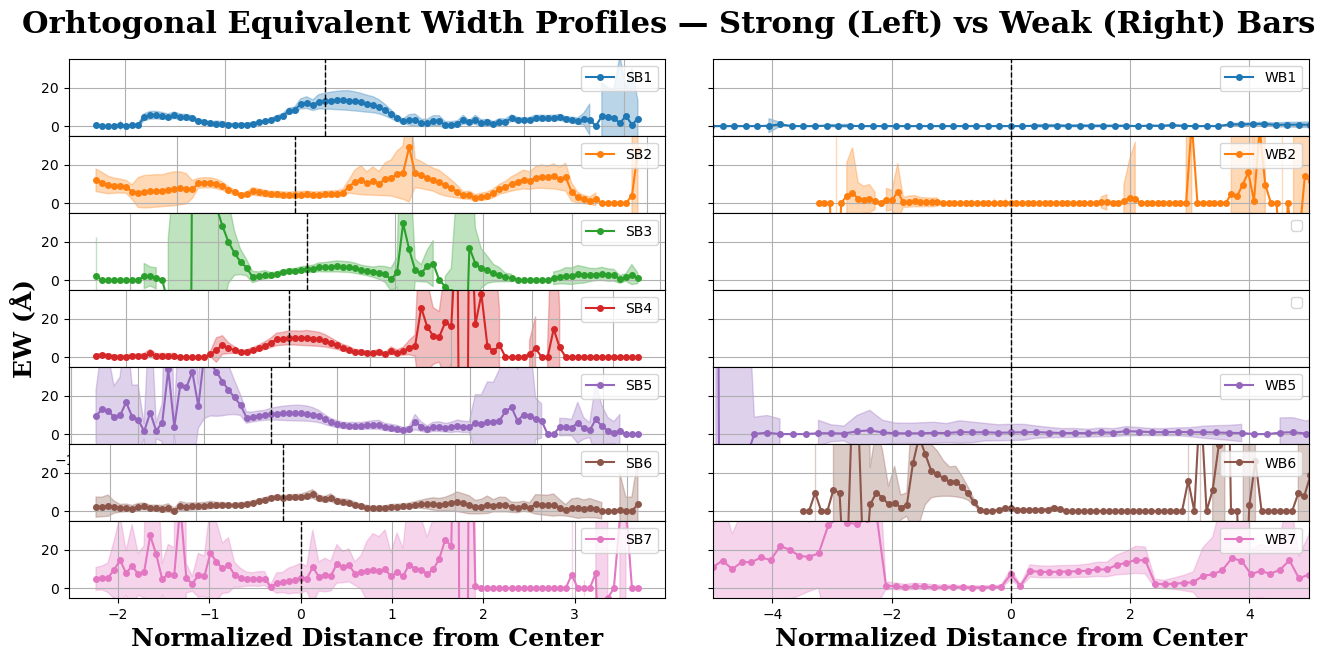

In [7]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey=True)

for row_idx, i in enumerate(sbs_orth.keys()):
    # --- Strong ---
    df_sb = sbs_orth[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels_orth[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]
    
    axs[row_idx, 0].plot(x_scaled_sb, df_sb["EW"], "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb,
        df_sb["EW"] - df_sb["EW_err"],
        df_sb["EW"] + df_sb["EW_err"],
        color=color_map[i], alpha=0.3
    )
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_orth:  # only plot if WB data exists for this index
        df_wb = wbs_orth[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels_orth[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]
        
        axs[row_idx, 1].plot(x_scaled_wb, df_wb["EW"], "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb,
            df_wb["EW"] - df_wb["EW_err"],
            df_wb["EW"] + df_wb["EW_err"],
            color=color_map[i], alpha=0.3
        )
    axs[row_idx, 1].set_ylim(-5, 35)
    axs[row_idx, 1].set_xlim(-5, 5)
    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)

# X and Y labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")
axs[len(sbs_orth)//2, 0].set_ylabel("EW (Å)", fontsize=18, fontweight="bold", family="serif")

plt.suptitle(
    "Orhtogonal Equivalent Width Profiles — Strong (Left) vs Weak (Right) Bars",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95)

plt.subplots_adjust(hspace=0, wspace=0.08)
plt.show()


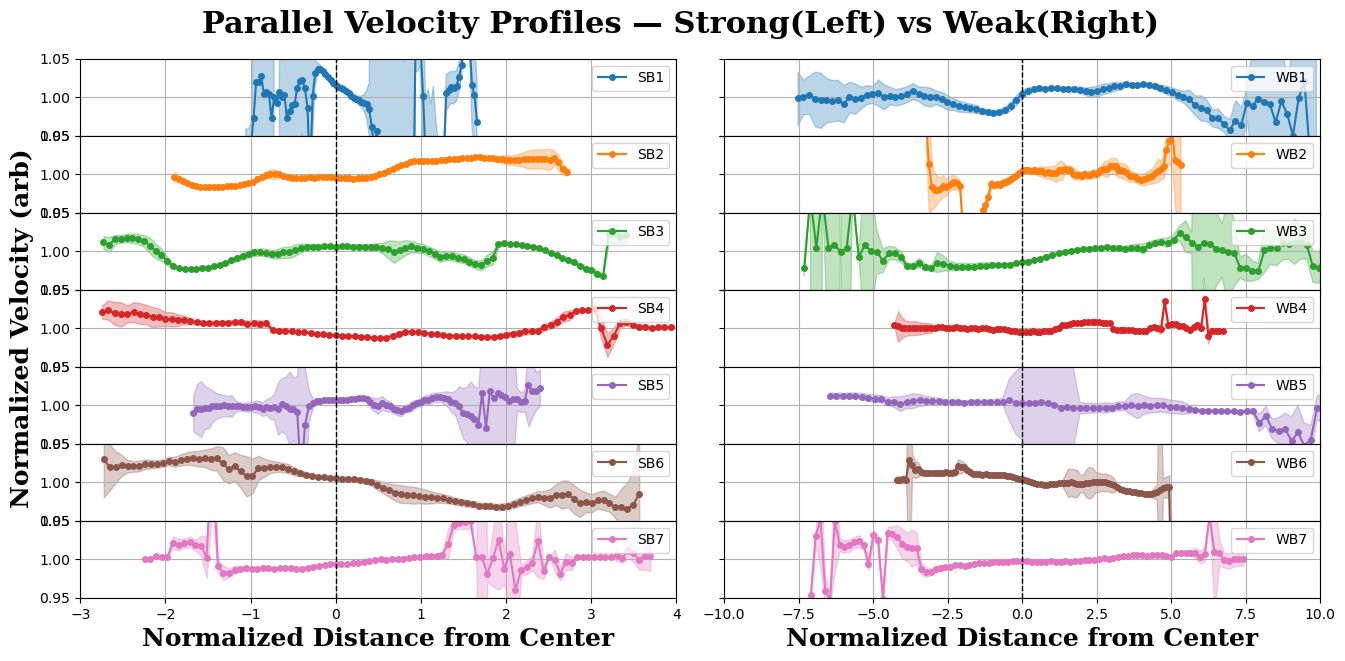

In [8]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey=True)

for row_idx, i in enumerate(sbs_parallel.keys()):
    # --- Strong ---
    df_sb = sbs_parallel[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]

    scale_sb = np.median(np.abs(df_sb["velocity"]))  # normalization factor
    vel_sb = df_sb["velocity"] / scale_sb
    err_sb = df_sb["velocity_err"] / scale_sb

    axs[row_idx, 0].plot(x_scaled_sb, vel_sb, "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb, vel_sb - err_sb, vel_sb + err_sb,
        color=color_map[i], alpha=0.3
    )
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 0].set_ylim(0.95, 1.05)
    axs[row_idx, 0].set_xlim(-3, 4)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_parallel:
        df_wb = wbs_parallel[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]

        scale_wb = np.median(np.abs(df_wb["velocity"]))
        vel_wb = df_wb["velocity"] / scale_wb
        err_wb = df_wb["velocity_err"] / scale_wb

        axs[row_idx, 1].plot(x_scaled_wb, vel_wb, "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb, vel_wb - err_wb, vel_wb + err_wb,
            color=color_map[i], alpha=0.3
        )

    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].set_xlim(-10, 10)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)


axs[len(sbs_orth)//2, 0].set_ylabel("Normalized Velocity (arb)", fontsize=18, fontweight="bold", family="serif")
for ax in axs[:-1, :].flatten():
    ax.tick_params(labelbottom=False) 
# Axis labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")

plt.suptitle(
    "Parallel Velocity Profiles — Strong(Left) vs Weak(Right)",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95
)
plt.subplots_adjust(hspace=0, wspace=0.08)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


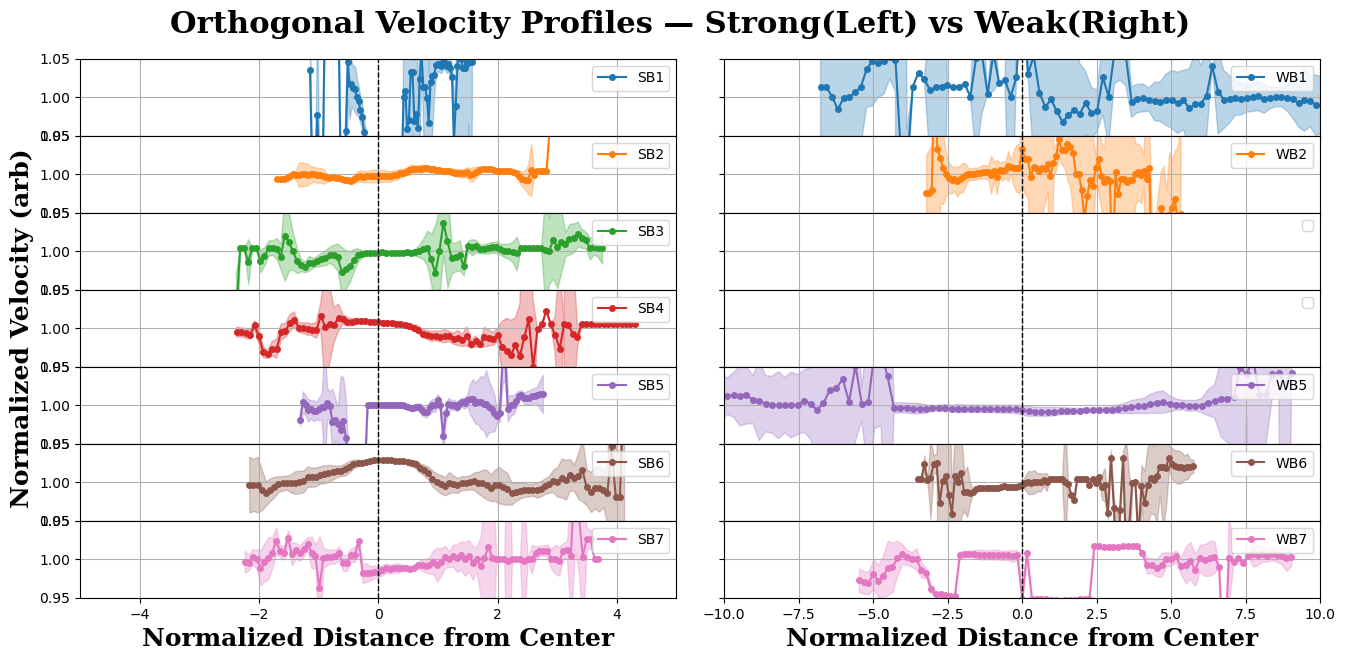

In [9]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey=True)

for row_idx, i in enumerate(sbs_orth.keys()):
    # --- Strong ---
    df_sb = sbs_orth[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels_orth[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]

    # Normalization
    scale_sb = np.median(np.abs(df_sb["velocity"]))
    vel_sb = df_sb["velocity"] / scale_sb
    err_sb = df_sb["velocity_err"] / scale_sb

    axs[row_idx, 0].plot(x_scaled_sb, vel_sb, "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb, vel_sb - err_sb, vel_sb + err_sb,
        color=color_map[i], alpha=0.3
    )
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].set_ylim(0.95, 1.05)
    axs[row_idx, 0].set_xlim(-5, 5)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_orth:
        df_wb = wbs_orth[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels_orth[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]

        scale_wb = np.median(np.abs(df_wb["velocity"]))
        vel_wb = df_wb["velocity"] / scale_wb
        err_wb = df_wb["velocity_err"] / scale_wb

        axs[row_idx, 1].plot(x_scaled_wb, vel_wb, "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb, vel_wb - err_wb, vel_wb + err_wb,
            color=color_map[i], alpha=0.3
        )

    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].set_xlim(-10, 10)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)

axs[len(sbs_orth)//2, 0].set_ylabel("Normalized Velocity (arb)", fontsize=18, fontweight="bold", family="serif")
for ax in axs[:-1, :].flatten():
    ax.tick_params(labelbottom=False) 
# Axis labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")
    
plt.suptitle(
    "Orthogonal Velocity Profiles — Strong(Left) vs Weak(Right)",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95
)

plt.subplots_adjust(hspace=0, wspace=0.08)
plt.show()


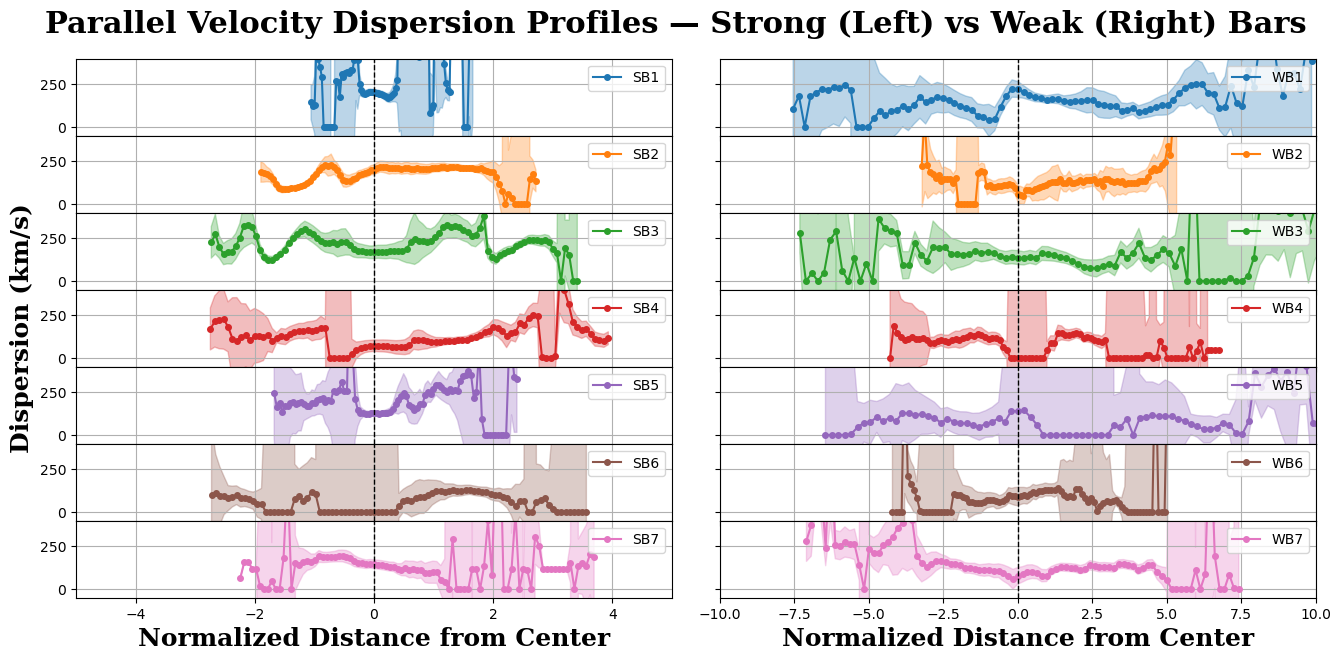

In [10]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey = True)

for row_idx, i in enumerate(sbs_parallel.keys()):
    # --- Strong ---
    df_sb = sbs_parallel[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]
    
    axs[row_idx, 0].plot(x_scaled_sb, df_sb["dispersion"], "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb,
        df_sb["dispersion"] - df_sb["dispersion_err"],
        df_sb["dispersion"] + df_sb["dispersion_err"],
        color=color_map[i], alpha=0.3
    )
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 0].set_ylim(-50, 400)
    axs[row_idx, 0].set_xlim(-5, 5)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_parallel:
        df_wb = wbs_parallel[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]
        
        axs[row_idx, 1].plot(x_scaled_wb, df_wb["dispersion"], "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb,
            df_wb["dispersion"] - df_wb["dispersion_err"],
            df_wb["dispersion"] + df_wb["dispersion_err"],
            color=color_map[i], alpha=0.3
        )
    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].set_xlim(-10, 10)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)
    
for ax in axs[:-1, :].flatten():
    ax.tick_params(labelbottom=False) 
# X and Y labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")
axs[len(sbs_parallel)//2, 0].set_ylabel("Dispersion (km/s)", fontsize=18, fontweight="bold", family="serif")

# Overall title
plt.suptitle(
    "Parallel Velocity Dispersion Profiles — Strong (Left) vs Weak (Right) Bars",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95
)

plt.subplots_adjust(hspace=0, wspace=0.08)
plt.savefig("Dispersion_profiles.png", dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


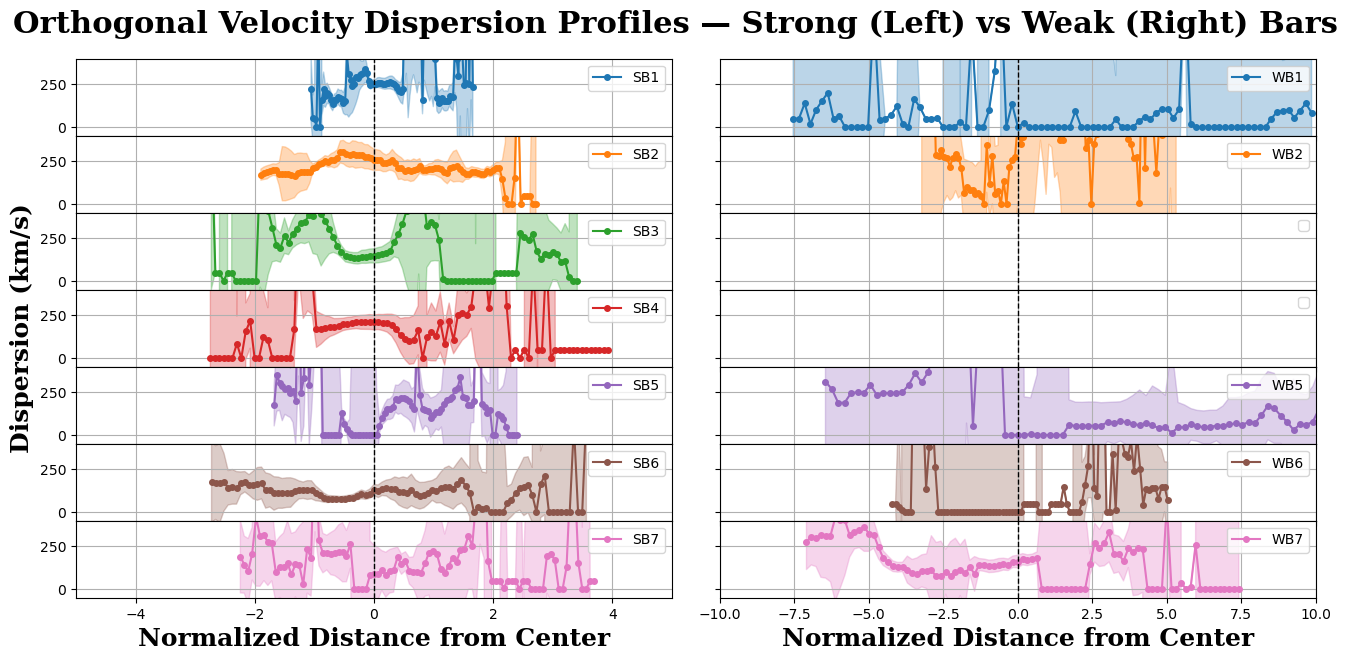

In [12]:
fig, axs = plt.subplots(len(sbs_parallel), 2, figsize=(16, 1*len(sbs_parallel)), sharey=True)

for row_idx, i in enumerate(sbs_orth.keys()):
    # --- Strong ---
    df_sb = sbs_orth[i]
    x_rel_sb = (df_sb["center"] - sb_center_pixels[i]) * 0.4
    x_scaled_sb = x_rel_sb / sb_bar_lengths[i]
    
    axs[row_idx, 0].plot(x_scaled_sb, df_sb["dispersion"], "o-", color=color_map[i], label=f"SB{i}", ms=4)
    axs[row_idx, 0].fill_between(
        x_scaled_sb,
        df_sb["dispersion"] - df_sb["dispersion_err"],
        df_sb["dispersion"] + df_sb["dispersion_err"],
        color=color_map[i], alpha=0.3
    )
    axs[row_idx, 0].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 0].set_ylim(-50, 400)
    axs[row_idx, 0].set_xlim(-5, 5)
    axs[row_idx, 0].grid(True)
    axs[row_idx, 0].legend(loc="upper right", fontsize=10)

    # --- Weak ---
    if i in wbs_orth:
        df_wb = wbs_orth[i]
        x_rel_wb = (df_wb["center"] - wb_center_pixels[i]) * 0.4
        x_scaled_wb = x_rel_wb / wb_bar_lengths[i]
        
        axs[row_idx, 1].plot(x_scaled_wb, df_wb["dispersion"], "o-", color=color_map[i], label=f"WB{i}", ms=4)
        axs[row_idx, 1].fill_between(
            x_scaled_wb,
            df_wb["dispersion"] - df_wb["dispersion_err"],
            df_wb["dispersion"] + df_wb["dispersion_err"],
            color=color_map[i], alpha=0.3
        )
    axs[row_idx, 1].axvline(0, color="black", ls="--", lw=1)
    axs[row_idx, 1].set_xlim(-10, 10)
    axs[row_idx, 1].grid(True)
    axs[row_idx, 1].legend(loc="upper right", fontsize=10)
    
for ax in axs[:-1, :].flatten():
    ax.tick_params(labelbottom=False) 
# X and Y labels
for ax in axs[-1, :]:
    ax.set_xlabel("Normalized Distance from Center", fontsize=18, fontweight="bold", family="serif")
axs[len(sbs_parallel)//2, 0].set_ylabel("Dispersion (km/s)", fontsize=18, fontweight="bold", family="serif")

# Overall title
plt.suptitle(
    "Orthogonal Velocity Dispersion Profiles — Strong (Left) vs Weak (Right) Bars",
    fontsize=22,
    fontweight="bold",
    family="serif",
    y=0.95
)

plt.subplots_adjust(hspace=0, wspace=0.08)
plt.savefig("Dispersion_profiles.png", dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()
